## Gradient Descent

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def gradient_descent(expr,xold,neta):
    flag = 1
    if not sym.is_convex(expr,x): # given the function is concave for all itervals
        flag=-1
    slope = sym.diff(expr,x)
    slope_val = slope.subs(x,xold)
    i = 10
    x_vals = [xold]
    while True:
        xnew = xold - neta*(slope_val)*flag
        slope_val = slope.subs(x,xnew)
        x_vals.append(xnew)
        if round(xold,3) == round(xnew,3):
            break
        xold = xnew
    print("Point of convergence somewhere close to :",x_vals[-1])
    return x_vals
        
    

In [11]:
def points(expr,x_vals):
    descent_points = []
    for i in x_vals:
        descent_points.append(expr.subs(x,i))
    return descent_points

Point of convergence somewhere close to : 1.99975585937500
Point of convergence somewhere close to : 2.00000000000000
Point of convergence somewhere close to : 2.00024414062500


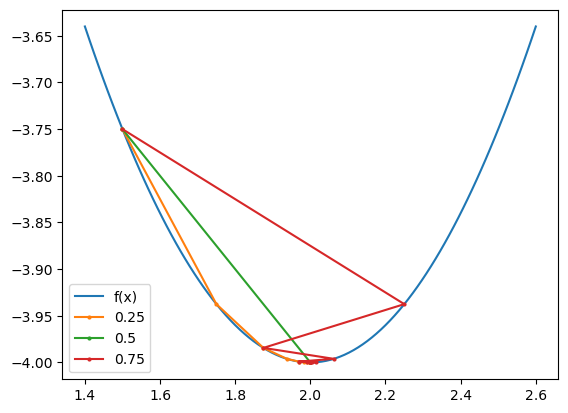

In [12]:
x = sym.symbols('x')
expression = x**2 - 4*x

x_points = np.linspace(1.4,2.6,100)
y_points = points(expression,x_points)
plt.plot(x_points,y_points)

netas = [0.25,0.5,0.75]
for neta in netas:
    x_vals = gradient_descent(expression,1.5,neta)
    gdy = points(expression,x_vals)
    plt.plot(x_vals,gdy,marker = 'o',ms=2)
plt.legend(['f(x)']+netas)